# Test the keypoint extractor
Here we test the keypoint extractor on a single video. And visualize the results to see if the extraction is working correctly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from keypoint_extractor import KeypointExtractor, KeypointExtractorV2


In [2]:
pose_model_path = "models/mediapipe/pose_landmarker_heavy.task"
extractor = KeypointExtractor(pose_model_path)

In [3]:
extracted = extractor.extract("data/raw/squats/squats_neil_2_1.mp4")

Processing data/raw/squats/squats_neil_2_1.mp4: 360x480, 120 frames
Extracted 120 frames from data/raw/squats/squats_neil_2_1.mp4


In [4]:
extracted.shape

(120, 33, 4)

In [5]:
def plot_keypoints(keypoints, frame_index=0):
    data = keypoints
    for i in range(33):
        data[0, i, 0] = i * 0.1
        data[0, i, 1] = np.sin(i * 0.5)
        data[0, i, 2] = i * 0.05
    selected_frame = data[frame_index]

    x_coords = selected_frame[:, 0]
    y_coords = selected_frame[:, 1]
    z_coords = selected_frame[:, 2]

    connections = [(0, 1), (1, 2), (2, 3), (3, 7), (0, 4), (4, 5),
                              (5, 6), (6, 8), (9, 10), (11, 12), (11, 13),
                              (13, 15), (15, 17), (15, 19), (15, 21), (17, 19),
                              (12, 14), (14, 16), (16, 18), (16, 20), (16, 22),
                              (18, 20), (11, 23), (12, 24), (23, 24), (23, 25),
                              (24, 26), (25, 27), (26, 28), (27, 29), (28, 30),
                              (29, 31), (30, 32), (27, 31), (28, 32)]

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot keypoints
    ax.scatter(x_coords, y_coords, z_coords, c='blue', marker='o', s=50, label='Keypoints')

    # Plot connections
    for connection in connections:
        start_point_idx = connection[0]
        end_point_idx = connection[1]
        ax.plot([x_coords[start_point_idx], x_coords[end_point_idx]],
                [y_coords[start_point_idx], y_coords[end_point_idx]],
                [z_coords[start_point_idx], z_coords[end_point_idx]], 'r-')

    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')
    ax.set_title(f'3D Pose with Skeletal Connections for Frame {frame_index}')
    ax.legend()

    plt.show()

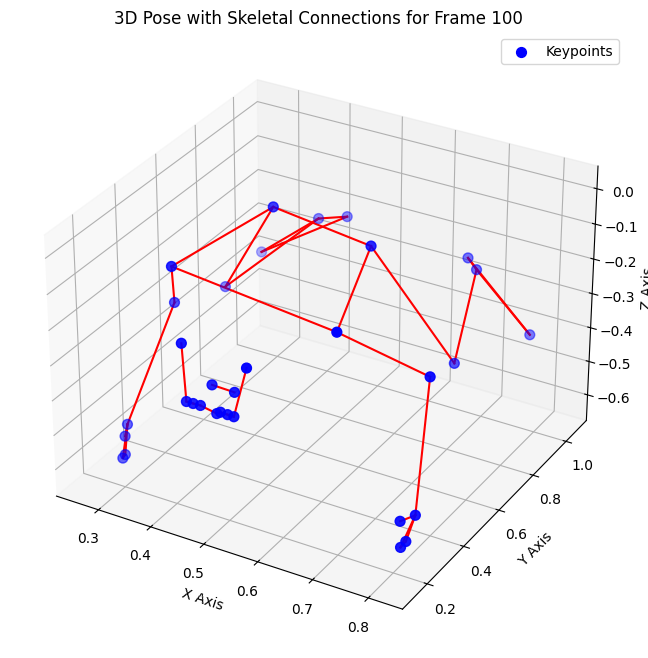

In [6]:
plot_keypoints(extracted, frame_index=100)  # Change frame_index to visualize different frames

In [7]:
# Extractor V2
extractor_v2 = KeypointExtractorV2(pose_model_path)

In [8]:
extracted_v2 = extractor_v2.extract("data/raw/squats/squats_neil_2_1.mp4")

Processing data/raw/squats/squats_neil_2_1.mp4: 360x480, 120 frames
Extracted and normalized 120 frames from data/raw/squats/squats_neil_2_1.mp4


In [10]:
extracted_v2.shape

(120, 33, 4)

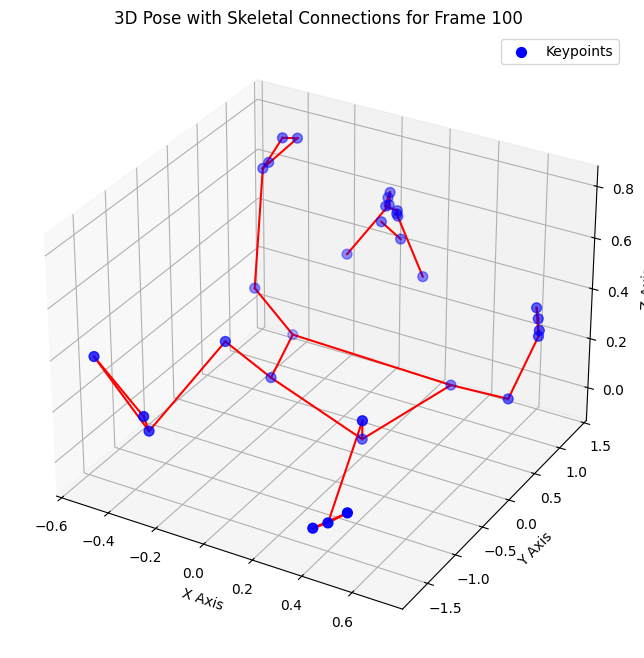

In [11]:
plot_keypoints(extracted_v2, frame_index=100)  # Change frame_index to visualize different frames

In [15]:
# Compare the two extractor with videos with different perspectives
def compare_extractors(video_path):
    extracted_v1 = extractor.extract(video_path)
    extracted_v2 = extractor_v2.extract(video_path)

    print(f"Extractor V1 shape: {extracted_v1.shape}")
    print(f"Extractor V2 shape: {extracted_v2.shape}")

    # Plot keypoints for both extractors
    plot_keypoints(extracted_v1, frame_index=10)
    plot_keypoints(extracted_v2, frame_index=10)

Processing data/unseen/deadlift_other.mp4: 816x1080, 121 frames
Extracted 120 frames from data/unseen/deadlift_other.mp4
Processing data/unseen/deadlift_other.mp4: 816x1080, 121 frames
Extracted and normalized 120 frames from data/unseen/deadlift_other.mp4
Extractor V1 shape: (120, 33, 4)
Extractor V2 shape: (120, 33, 4)


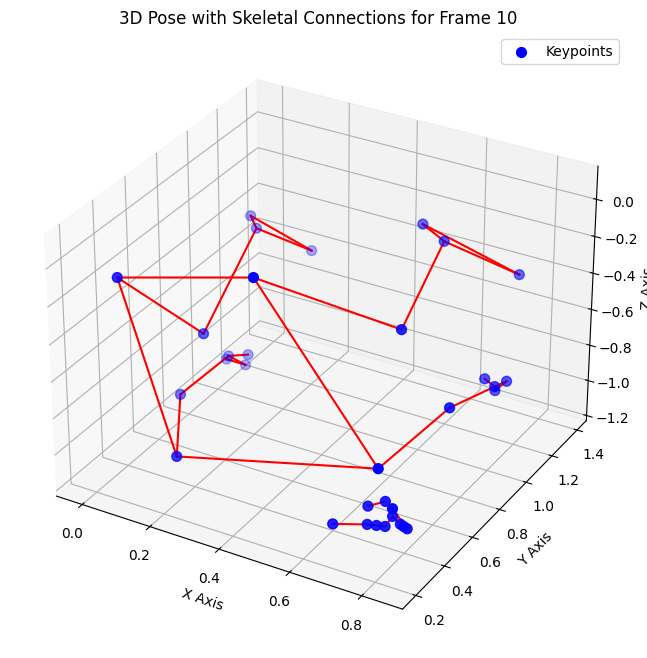

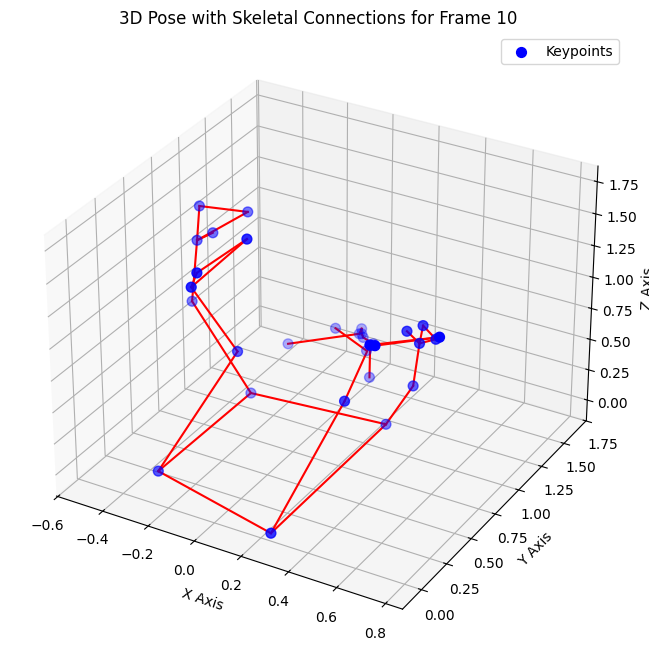

In [20]:
compare_extractors("data/unseen/deadlift_other.mp4")